In [ ]:
""" 
Usage: 
effectue les phases de montée et descente pour calculer le prefix exclusif,
sur un tableau 1D , calcul effectué sur GPU

======
    argument1:  un tableau numpy de taille n=2^m

"""
__authors__ = ("Charles Canavaggio, Lina Belkarfa")
__contact__ = ("ccanavaggio@yahoo.fr, linabelkarfa@mail.com")
__copyright__ = "MIT"
__date__ = "2021-11-10"
__version__= "1.2.3"



# Viola Jones
Dans ce projet vous allez améliorer une implémentation existante de Viola-Jones qui s'exécute sur CPU. Vous devez remplacer les parties du code qui font du calcul intensif par leurs version sur parallèle sur GPU. Le but est d'avoir une version plus rapide que la version séquentielle.

* L'idée générale pour trouver un visage est de chercher des zones de dont le contraste est particulier. 
* Par exemple, les yeux sont en général séparés par une partie plus sombre (le nez). 
* Cette analyze est couteuse car elle doit être faite sur toutes les zones de l'image et à différentes échelles. 
* Pour améliorer la performance, on a recours à du machine learning.
* Les deux tutoriaux de la section précédente utilisent du code partagé sur github. Nous allons l'utiliser comme base de notre projet. Attention, il nécessite d'installer le framework Pickle avec PIP.
* L'avantage de cette version de Viola-Jones est qu'elle vient avec un classifieur déjà entrainé.
* Trouvez comment charger le classifieur déjà entrainé et testez quelques images.

### Un peu de code

Les deux tutoriaux de la section précédente utilisent du code partagé sur github. Nous allons l'utiliser comme base de notre projet. Attention, il nécessite d'installer le framework Pickle avec PIP.

    1. Clonez le dépot
    2. À quoi correspondent chacun des fichiers pickle contenus dans le projet ?
    3. Quel jeu de données a été utilisé pour l'entrainement et les tests ?

L'avantage de cette version de Viola-Jones est qu'elle vient avec un classifieur déjà entrainé.

    4. Trouvez comment charger le classifieur déjà entrainé et testez quelques images.



### Le projet
Votre mission, si vous l'acceptez, consistera à ajouter des versions parallèles/GPU des algorithmes utilisés dans ce code et montrer leur intérêt. Plus précisément, vous devez

* Écrire une version Numba/Cuda pour calculer l'image intégrale
* Écrire une méthode qui parallelise le calcul des features sur GPU
* Créer un fichier projet.py qui contient deux méthodes :
    * **bench_train() qui exécute un entrainement sur un nombre variable d'images et affiche le temps à chaque fois.**
    * **bench_accuracy() qui charge les modèles précédents et mesure la précision sur un jeu d'image test**


In [7]:
import pandas as pd

    2. À quoi correspondent chacun des fichiers pickle contenus dans le projet ?

- 50.pkl
  - Un classificateur de Viola Jones à 50 features
- 200.pkl
  - Un classificateur de Viola Jones à 200 features

In [2]:
pkl_50 = pd.read_pickle("50.pkl")
pkl_200 = pd.read_pickle("200.pkl")

L'hyperparamètre T pour la classe ViolaJones représente le nombre de classifieurs faibles qu'elle utilise. 

In [3]:
print("50.pkl --------------------------------------------------------")
print("T      :",pkl_50.T)
print("alphas :",pkl_50.alphas)

print("\n200.pkl -------------------------------------------------------")
print("T      :",pkl_200.T)
#print("alphas :",pkl_200.alphas)

50.pkl --------------------------------------------------------
T      : 50
alphas : [6.575151471691273, 7.0045808180015126, 7.811466186579517, 10.094419484548858, 14.665004303458257, 12.583252453833444, 16.550790267681823, 8.855204362455288, 14.451665866316553, 14.147373044174135, 10.981774770867233, 14.533376682346471, 14.77264924071334, 14.138093749404545, 13.546981406195357, 14.533816775372589, 12.661641640878317, 17.22195564059618, 11.589884074900695, 15.317850914529823, 16.75980676182151, 16.540664633099702, 15.524625989815204, 12.540079223731851, 15.906296747913903, 15.881213071124646, 17.95569066403762, 16.14186979448674, 15.032596009119612, 17.205461104695452, 13.287260288763166, 17.044428024960375, 15.320113600123902, 16.590856549112278, 15.178079082672047, 16.25447628940236, 12.507731955478711, 16.665953661030333, 12.998997458332429, 14.192303324327291, 18.899365234201493, 18.033821183786735, 16.36210455987432, 16.973219044921407, 15.694533072016343, 17.41613310907783, 13.10

- cascade.pkl
  - Un "attentional cascade" classificateurs regardant 1 feature, 5 features, 10 features, et 50 features.



In [4]:
cascade = pd.read_pickle("cascade.pkl")

In [5]:
print("Cascade Layers :",cascade.layers)
print("---------------------------------------------------------------")


Cascade Layers : [1, 2, 5, 10, 50]
---------------------------------------------------------------



    3. Quel jeu de données a été utilisé pour l'entrainement et les tests ?


- training.pkl
  - Un tableau de tuples. Le premier élément de chaque tuple est un tableau numpy représentant l'image. Le deuxième élément est sa classification (1 pour visage, 0 pour non visage).
  - 2429 images de visage, 4548 images de non-face

- test.pkl
  - Un tableau de tuples. Le premier élément de chaque tuple est un tableau numpy représentant l'image. Le deuxième élément est sa classification (1 pour visage, 0 pour non visage).
  - 472 visages, 23573 images sans visage



Chaque image est en 19x19 et en niveaux de gris. Il y a un TrainSet de :  2 429 visages, 4 548 non-visages.
TestSet : 472 visages, 23,573 non-faces 

In [8]:
training = pd.read_pickle("training.pkl")
testing = pd.read_pickle("test.pkl")

In [7]:
import PIL
from PIL import Image
m = Image.fromarray(training[0][0])
m

<Figure size 432x288 with 0 Axes>

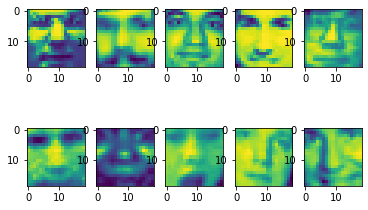

In [8]:
import matplotlib.pyplot as plt

plt.figure()

f, axarr = plt.subplots(2,5) 

axarr[0,0].imshow(Image.fromarray(training[0][0]))
axarr[0,1].imshow(Image.fromarray(training[1][0]))
axarr[0,2].imshow(Image.fromarray(training[2][0]))
axarr[0,3].imshow(Image.fromarray(training[3][0]))
axarr[0,4].imshow(Image.fromarray(training[4][0]))

axarr[1,0].imshow(Image.fromarray(testing[0][0]))
axarr[1,1].imshow(Image.fromarray(testing[1][0]))
axarr[1,2].imshow(Image.fromarray(testing[2][0]))
axarr[1,3].imshow(Image.fromarray(testing[3][0]))
axarr[1,4].imshow(Image.fromarray(testing[4][0]))

    4. Trouvez comment charger le classifieur déjà entrainé et testez quelques images.


In [12]:
import time 
def evaluate(clf, data):
    correct = 0
    all_negatives, all_positives = 0, 0
    true_negatives, false_negatives = 0, 0
    true_positives, false_positives = 0, 0
    classification_time = 0

    for x, y in data:
        if y == 1:
            all_positives += 1
        else:
            all_negatives += 1

        start = time.time()
        prediction = clf.classify(x)
        classification_time += time.time() - start
        if prediction == 1 and y == 0:
            false_positives += 1
        if prediction == 0 and y == 1:
            false_negatives += 1
        
        correct += 1 if prediction == y else 0
    
    print("False Positive Rate: %d/%d (%f)" % (false_positives, all_negatives, false_positives/all_negatives))
    print("False Negative Rate: %d/%d (%f)" % (false_negatives, all_positives, false_negatives/all_positives))
    print("Accuracy: %d/%d (%f)" % (correct, len(data), correct/len(data)))
    print("Average Classification Time: %f" % (classification_time / len(data)))


evaluate(cascade, testing) # le classifieur a été chargé dans "cascade" dans les cellules précédentes et testing est l'ensemble de test


False Positive Rate: 129/23573 (0.005472)
False Negative Rate: 451/472 (0.955508)
Accuracy: 23465/24045 (0.975879)
Average Classification Time: 0.000728


# Annexes
#### Nous avons essayé de coder la fonction de transposé mais elle ne fonctionne pas. Nous avons donc prit une autre sur internet que nous avons implémenté.
Voici celle que nous avions commencé à faire : 

In [3]:
import numba
from numba import cuda
import sys
import numpy as np

BLOCK_DIM = 16
#grid_dim = number_threads_blocks * image_width

tableau = np.ndarray(shape=(10,10), dtype=int)

tableau_output = np.ndarray(shape=(tableau.shape[1], tableau.shape[0]), dtype = tableau.dtype)
    
@cuda.jit
def transpose(tableau, tableau_output):
    
    temp = cuda.shared.array(shape=(BLOCK_DIM,BLOCK_DIM +1))
    height, width = tableau.shape
    # cré un tableau dans la memoire local du kernel CUDA
    # Creates an array in the local memory space of the CUDA kernel with the given shape and dtype.
    # numba.cuda.shared.array(shape,dtype)

    xIndex = cuda.blockIdx.x * BLOCK_DIM + cuda.threadIdx.x
    yIndex = cuda.blockIdx.y * BLOCK_DIM + cuda.threadIdx.y

    if ((xIndex < width) and (yIndex < height )):

        id_in = yIndex * width + xIndex
        temp[cuda.threadIdx.y,cuda.threadIdx.x] = tableau[id_in]

    cuda.syncthreads()

    xIndex = cuda.blockIdx.X * BLOCK_DIM + cuda.threadIdx.x
    yIndex = cuda.blockIdx.y * BLOCK_DIM + cuda.threadIdx.y

    if ((xIndex < height) and (yIndex < width)):
        id_out = yIndex * height + xIndex
        tableau_output[id_out] = temp[cuda.threadIdx.x,cuda.threadIdx.y]



tableau = np.ndarray(shape=(5,5), dtype = np.int64)
print(tableau)


def run1D():
    #4 blocks of 16 threads
    threadsPerBlock = 2
    blocksPerGrid = 4
    print("Starting",sys._getframe(  ).f_code.co_name)
    print("threadsPerBlock ", threadsPerBlock)
    print("blocksPerGrid", blocksPerGrid, '\n')

    # Send array to device 
    print('tableau avant montee/descente : \n',tableau, '\n')
    d_tableau = cuda.to_device(tableau)
    d_tableau_output = cuda.to_device(tableau_output)
    transpose[blocksPerGrid,threadsPerBlock]( d_tableau, d_tableau_output)
    cuda.synchronize()
    
    h_tableau = d_tableau.copy_to_host()
        
    print('tableau apres montee/descente : \n', h_tableau)
    
if __name__ == '__main__':
    
    run1D()

[[25895968444448860 21392493370802244 27866473672671343 25896161720467561
  25896118771056748]
 [28429470870863987 27866439313522733 28429415035764843 32933044727578739
  25896114475630701]
 [27303502245331043 30681223440564316 32651513917341813 27866417838817391
  28147914289447029]
 [26740517932236914 27866542392737887 28429419330863201 28429367790993503
  32088624093855858]
 [34058953224814638 30962724186357876 12948089450201133      425209692272
                  0]]
Starting run1D
threadsPerBlock  2
blocksPerGrid 4 

tableau avant montee/descente : 
 [[25895968444448860 21392493370802244 27866473672671343 25896161720467561
  25896118771056748]
 [28429470870863987 27866439313522733 28429415035764843 32933044727578739
  25896114475630701]
 [27303502245331043 30681223440564316 32651513917341813 27866417838817391
  28147914289447029]
 [26740517932236914 27866542392737887 28429419330863201 28429367790993503
  32088624093855858]
 [34058953224814638 30962724186357876 12948089450201133   

D:\Logiciel\lib\site-packages\numba\cuda\compiler.py:865: NumbaPerformanceWarning: Grid size (4) < 2 * SM count (12) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


TypingError: Failed in cuda mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function shared.array at 0x000002054D78C550>) found for signature:
 
 >>> array(shape=Tuple(Literal[int](16), int64))
 
There are 2 candidate implementations:
[1m      - Of which 2 did not match due to:
      Overload in function 'array': File: numba\cuda\cudadecl.py: Line 44.
        With argument(s): '(shape=UniTuple(int64 x 2))':[0m
[1m       Rejected as the implementation raised a specific error:
         TypeError: typer() missing 1 required positional argument: 'dtype'[0m
  raised from D:\Logiciel\lib\site-packages\numba\core\typing\templates.py:405
[0m
[0m[1mDuring: resolving callee type: Function(<function shared.array at 0x000002054D78C550>)[0m
[0m[1mDuring: typing of call at C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_21692/2204352262.py (16)
[0m
[1m
File "..\..\..\..\..\Public\Documents\Wondershare\CreatorTemp\ipykernel_21692\2204352262.py", line 16:[0m
[1m<source missing, REPL/exec in use?>[0m


#### Nous avons aussi tenté une meilleure alocation de la mémoire mais n'arrivions pas à déterminer le bon nombre de threads et de block à utiliser : 


In [9]:
# Fonction scan exclusif 
import math 

@cuda.jit
def scanGPU_MonteeDescente(argument1,m):
    
    global_id = cuda.grid(1)
    
    # Algo de montée 
    for d in range(0,m):
        step = 2**(d+1)
        step2 = 2**(d)
        
        if global_id <= N-1:
            k = global_id * step
            argument1[k + step-1] += argument1[k+step2-1]

    # Algo descente 
    argument1[N-1] = 0
    for  d in range(m-1, 0-1, -1):
        step = 2**(d+1)
        step2 = 2**(d)
        
       # global_id = cuda.grid(1)
        if  global_id <= N-1:
            k = global_id * step
            t= argument1[k+step2-1]
            argument1[k+step2-1] = argument1[k+step-1] 
            argument1[k+step-1] += t


# ------------- LA PARTIE GALERE...... ----------------#

@cuda.jit
def image_integrale(image):

    padding = np.zeros((19,13))
    padding2 = np.zeros((13,32))
    image = np.concatenate([image,padding], axis=1)
    image = np.concatenate([image,padding2], axis = 0)
    image = image.astype(np.int64)
    
    m = int(math.log2(image[0].shape))
    N = image[0].shape
    GRID_BLOCK = int(image[0].shape/N)
    THREAD_BLOCK = N

    x = cuda.threadIdx.x + (cuda.blockDim.x * cuda.blockIdx.x)
    y = cuda.threadIdx.y + (cuda.blockDim.y * cuda.blockIdx.y)

    if x <=32 :
        scanGPU_MonteeDescente[1,32](image[x],m)
        cuda.synchronize()
    
    test = transpose(image)
    test = test.copy_to_host()
    
    if y <=32 :
        scanGPU_MonteeDescente[1,32](test[y],m)
        cuda.synchronize()
    scan2 = test  
    global test2
    test2 = transpose(scan2)
    test2 = test2.copy_to_host()
    test2 = test2[1:20,1:20]
    
    return test2

In [10]:
#taille d'un threads (dim)
threadsBlock = (16,16,1)


weights = np.zeros(len(training))
training_data = []
print("Computing integral images GPU")
for x in range(len(training)):
    print(x)
    training_data.append((image_integrale[1,32](training[x][0]), training[x][1]))
    if training[x][1] == 1:
        weights[x] = 1.0 / (2 )
    else:
        weights[x] = 1.0 / (2  )

print("Building features")



Computing integral images GPU
0


D:\Logiciel\lib\site-packages\numba\cuda\compiler.py:865: NumbaPerformanceWarning: Grid size (1) < 2 * SM count (12) will likely result in GPU under utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


UnsupportedError: Failed in cuda mode pipeline (step: analyzing bytecode)
[1mUse of unsupported opcode (STORE_GLOBAL) found
[1m
File "..\..\..\..\..\Public\Documents\Wondershare\CreatorTemp\ipykernel_21692\2606176889.py", line 63:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m